In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

Matplotlib is building the font cache; this may take a moment.


cd /projectnb/batmanlab/haozhe/Lung_Mesh_Segment/copd_seg/lung_project_git
python preprocess.py --dataset copdgene --data_root /projectnb/batmanlab/mragoza/COPDGene --subject 16514P

In [19]:
import sys, os, pathlib
#os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import pandas as pd
import nibabel as nib
import torch
import pyvista as pv

sys.path.append('../..')
import project
from project.core.utils import pprint

torch.cuda.is_available()

True

In [20]:
# nb configuration
data_root = pathlib.Path("/projectnb/batmanlab/haozhe/COPDGene")
data_file = data_root / 'sample1000_2025-07-22.csv'
fixed_state  = 'EXP'
moving_state = 'INSP'

In [14]:
df = pd.read_csv(data_file, sep='\t', low_memory=False)
df

,sid,ccenter,kernel,Emphysema,pctEmph,pctEmph_Slicer,FEV1pp_utah,FVCpp_utah,FEV1_FVC_utah,finalGold,catEmph
0,16514P,TEM,STD,0,0.3373,0.3147,77.6,88.9,0.71,-1.0,normal
1,20748Q,UAB,STD,0,3.6045,3.4085,73.2,75.8,0.75,-1.0,normal
2,11007Z,USD,STD,0,0.3126,0.2867,66.7,108.0,0.47,2.0,normal
3,14771Z,HPR,STD,0,0.3160,0.2948,94.1,97.0,0.73,0.0,normal
4,13651K,UIA,STD,0,2.0807,1.9551,85.1,88.0,0.75,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...
995,20519B,DUK,STD,1,30.1942,29.6440,19.9,69.2,0.22,4.0,severe
996,12294H,UAB,STD,1,40.3908,39.5845,43.3,86.0,0.37,3.0,severe
997,23123R,TEM,STD,0,23.6838,22.7617,42.8,72.7,0.45,3.0,severe
998,16546C,UIA,STD,1,42.6116,41.8307,58.6,99.6,0.43,2.0,severe


In [25]:
%autoreload
ds = project.datasets.copdgene.COPDGeneDataset(data_root)
ex = next(ds.examples(
    subjects=['16514P'],
    visit='Phase-1',
    variant='iso',
    state_pairs=[('EXP', 'INSP')]
))
pprint(ex)

Example()
├── dataset:  'COPDGene'
├── subject:  '16514P'
├── variant:  'iso'
├── paths:    dict(len=14)
|   ├── 'ref_image':     PosixPath('/projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz')
|   ├── 'fixed_source':  PosixPath('/projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz')
|   ├── 'moving_source': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz')
|   ├── 'fixed_image':   PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz')
|   ├── 'moving_image':  PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz')
|   ├── 'binary_mask':   PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_combined.nii.gz')
|   ├── 'region_mask':   PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phas

In [27]:
print(ex.paths)

{'ref_image': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz'), 'fixed_source': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz'), 'moving_source': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz'), 'fixed_image': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz'), 'moving_image': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz'), 'binary_mask': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_combined.nii.gz'), 'region_mask': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz'), 'surface_mesh': PosixPath('/projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/meshes/16514P_EXP_STD_TEM_

! python copd_seg/lung_project_git/preprocess.py \
    --dataset copdgene \
    --data_root /projectnb/batmanlab/haozhe/COPDGene \
    --variant ISO \
    --subject 16514P

python: can't open file '/projectnb/batmanlab/haozhe/Lung_Mesh_Segment/copd_seg/lung_project_git/notebooks/copdgene/copd_seg/lung_project_git/preprocess.py': [Errno 2] No such file or directory


# Visualize source images

In [29]:
import importlib
importlib.reload(project)

<module 'project' from '/projectnb/batmanlab/haozhe/Lung_Mesh_Segment/copd_seg/lung_project_git/notebooks/copdgene/../../project/__init__.py'>

Loading /projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz
[[  -0.71875    -0.          0.        167.640625]
 [   0.          0.71875     0.         -6.640625]
 [   0.          0.          0.5      -319.      ]
 [   0.          0.          0.          1.      ]]


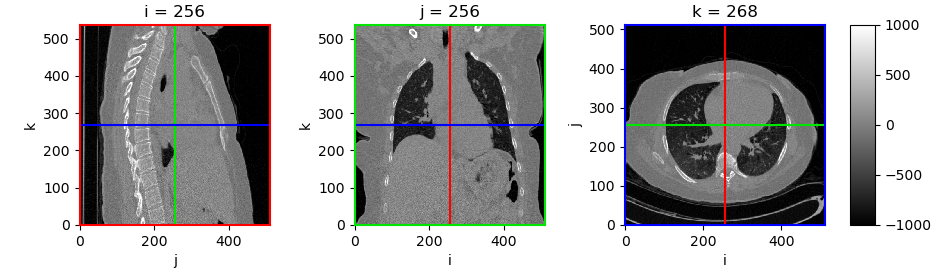

In [30]:
fixed_source = project.core.fileio.load_nibabel(ex.paths['fixed_source'])
print(fixed_source.affine)

_ = project.visual.matplotlib.show_image_slices(fixed_source.get_fdata(), cmap='gray', vmin=-1000, vmax=1000)

Loading /projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz


[[  -0.71875      -0.            0.          167.640625  ]
 [   0.            0.71875       0.           -6.640625  ]
 [   0.            0.            0.70000076 -318.50030518]
 [   0.            0.            0.            1.        ]]


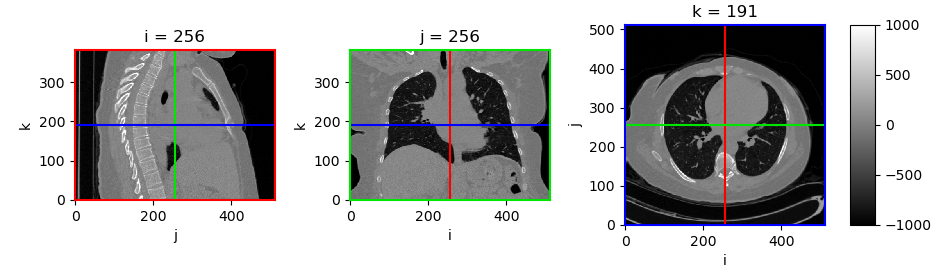

In [31]:
moving_source = project.core.fileio.load_nibabel(ex.paths['moving_source'])
print(moving_source.affine)

_ = project.visual.matplotlib.show_image_slices(moving_source.get_fdata(),  cmap='gray', vmin=-1000, vmax=1000)

# Resampling images

In [35]:
%autoreload
project.preprocessing.api.resample_image_on_reference(
    input_path=ex.paths['fixed_source'],
    output_path=ex.paths['fixed_image'],
    reference_path=ex.paths['ref_image']
)

Loading /projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz
Creating reference grid
Resampling image on grid
Saving /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz
Done


In [36]:
%autoreload
project.preprocessing.api.resample_image_on_reference(
    input_path=ex.paths['moving_source'],
    output_path=ex.paths['moving_image'],
    reference_path=ex.paths['ref_image']
)

Loading /projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_INSP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/Images/16514P/Phase-1/RAW/16514P_EXP_STD_TEM_COPD.nii.gz
Creating reference grid
Resampling image on grid
Saving /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz
Done


Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz


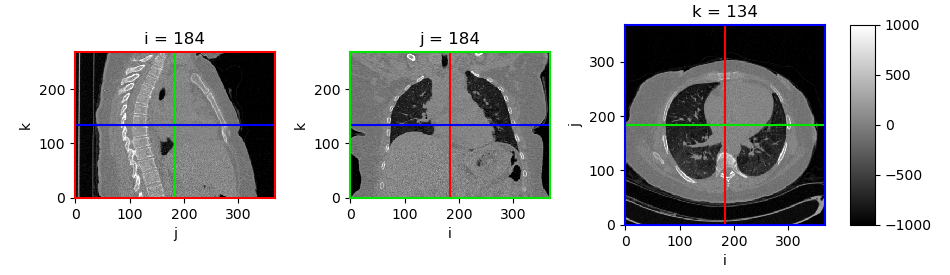

In [37]:
fixed_image = project.core.fileio.load_nibabel(ex.paths['fixed_image'])

_ = project.visual.matplotlib.show_image_slices(
    fixed_image.get_fdata(), cmap='gray', clim=(-1000, 1000)
)

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz


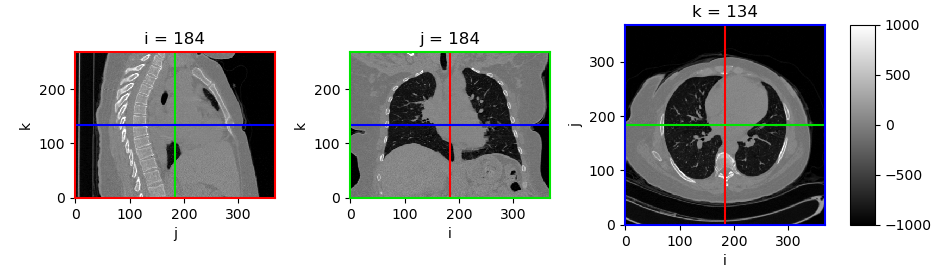

In [38]:
moving_image = project.core.fileio.load_nibabel(ex.paths['moving_image'])

_ = project.visual.matplotlib.show_image_slices(
    moving_image.get_fdata(), cmap='gray', clim=(-1000, 1000)
)

# Lung segmentation

In [39]:
%autoreload
project.preprocessing.api.create_segmentation_masks(
    image_path=ex.paths['fixed_image'],
    output_path=ex.paths['region_mask']
)

Running TotalSegmentator task: total

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

TotalSegmentator sends anonymous usage statistics. If you want to disable it check the documentation.


Downloading: 100%|██████████| 234M/234M [00:01<00:00, 225MB/s]  


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:01<00:00, 202MB/s]  


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:01<00:00, 161MB/s]  


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:01<00:00, 143MB/s]  


Download finished. Extracting...


Downloading: 100%|██████████| 234M/234M [00:01<00:00, 172MB/s]  


Download finished. Extracting...
Generating rough segmentation for cropping...


Downloading: 100%|██████████| 135M/135M [00:00<00:00, 201MB/s]  


Download finished. Extracting...
Resampling...
  Resampled in 1.16s
Predicting...


100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


  Predicted in 6.45s
Resampling...
  cropping from (368, 368, 269) to (278, 224, 229)
Resampling...
  Resampled in 1.58s
Predicting part 1 of 1 ...


100%|██████████| 8/8 [00:00<00:00, 19.46it/s]


  Predicted in 6.00s
Resampling...
Saving segmentations...
  Saved in 1.07s
Running TotalSegmentator task: lung_vessels

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024



Downloading: 100%|██████████| 231M/231M [00:01<00:00, 165MB/s]  


Download finished. Extracting...
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.15s
Predicting...


100%|██████████| 1/1 [00:00<00:00, 223.35it/s]


  Predicted in 4.43s
Resampling...
  cropping from (368, 368, 269) to (278, 224, 229)
Predicting...


100%|██████████| 60/60 [00:01<00:00, 36.87it/s]


  Predicted in 18.12s
Saving segmentations...
Creating lung_vessels.nii.gzCreating lung_trachea_bronchia.nii.gz

  Saved in 1.07s
Combining segmentation masks: lung
Saving /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz
Done


In [40]:
%autoreload
project.preprocessing.api.create_lung_region_mask(
    mask_dir=ex.paths['region_mask'].parent,
    output_path=ex.paths['region_mask']
)

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_upper_lobe_right.nii.gz
Filtering segmentation mask: lung_upper_lobe_right
Input 1-connected components: 4
  Voxel counts:   [427554     66      4      2] 427626
Output 1-connected components: 1
  Voxels dropped: 72 (0.0168%)
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_middle_lobe_right.nii.gz
Filtering segmentation mask: lung_middle_lobe_right
Input 1-connected components: 1
  Voxel counts:   [256495] 256495
Output 1-connected components: 1
  Voxels dropped: 0 (0.0000%)
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_lower_lobe_right.nii.gz
Filtering segmentation mask: lung_lower_lobe_right
Input 1-connected components: 5
  Voxel counts:   [490815      8      4      2      1] 490830
Output 1-connected components: 1
  Voxels dropped: 15 (0.0031%)
Loading /projectnb/batmanlab/haozhe/CO

In [41]:
region_mask = project.core.fileio.load_nibabel(ex.paths['region_mask'])

_ = project.visual.matplotlib.show_image_slices(
    region_mask.get_fdata(), cmap='jet', clim=(0, 8), colors='cmy'
)

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz


2025-11-05 15:28:33.721 (1808.881s) [    14EFF3354400]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=


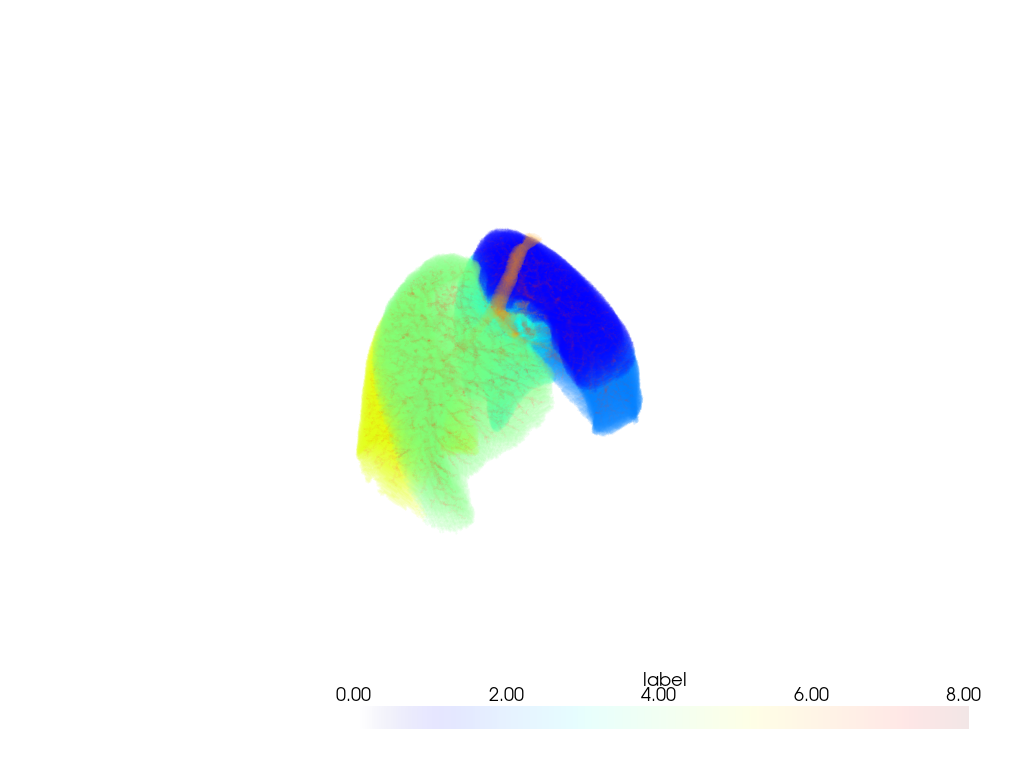

In [42]:
import pyvista as pv

def as_pyvista_grid(affine, **arrays):
    grid = pv.ImageData(
        dimensions=next(iter(arrays.values())).shape,
        spacing=np.linalg.norm(affine[:3,:3], axis=1),
        origin=affine[:3,3]
    )
    for k, v in arrays.items():
        grid.point_data[k] = v.flatten(order='F').astype(float)
    return grid

pv_grid = as_pyvista_grid(region_mask.affine, label=region_mask.get_fdata())

opacity = np.ones(9)
opacity[0] = 0

p = pv.Plotter()
p.add_volume(pv_grid, cmap='jet', clim=(0, 8), opacity=opacity * 0.1)
p.show(jupyter_backend='static')

# Generate volume mesh

In [69]:
%autoreload
project.preprocessing.api.create_volume_mesh_from_mask(
    mask_path=ex.paths['region_mask'],
    output_path=ex.paths['volume_mesh'],
    use_affine_spacing=False,
    pygalmesh_kws={
        'max_facet_distance': 0.8, # 0.8
        'max_cell_circumradius': 10.0 # 10
    }
)

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz


Generating volume mesh from mask
Removed 0 unreferenced point(s)
Mesh has 1 connected component(s)
<meshio mesh object>
  Number of points: 30493
  Number of cells:
    triangle: 115108
    tetra: 158843
  Point data: medit:ref
  Cell data: label
Saving /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/meshes/16514P_EXP_STD_TEM_COPD/lung_volume.xdmf
Done


Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/meshes/16514P_EXP_STD_TEM_COPD/lung_volume.xdmf


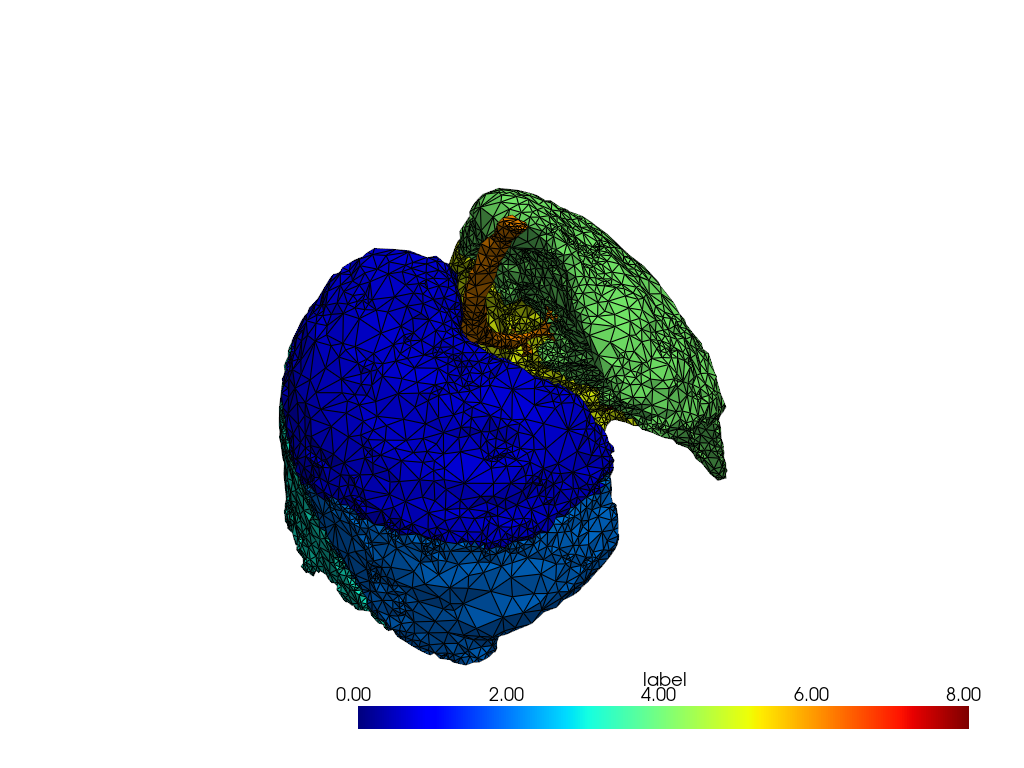

In [70]:
import pyvista as pv
vol_mesh = project.core.fileio.load_meshio(ex.paths['volume_mesh'])
pv_mesh = pv.from_meshio(vol_mesh)
pl = pv.Plotter()
pl.add_mesh(pv_mesh, scalars='label', cmap='jet', clim=(0, 8), show_edges=True)
pl.show(jupyter_backend='static')

# Register displacement field

In [50]:
import project.preprocessing.registration

fixed_nifti = project.core.fileio.load_nibabel(ex.paths['fixed_image'])
moving_nifti = project.core.fileio.load_nibabel(ex.paths['moving_image'])
mask_nifti = project.core.fileio.load_nibabel(ex.paths['region_mask'])

disp_voxel, warped_array = project.preprocessing.registration.register_corrfield(
    image_mov=moving_nifti.get_fdata(),
    image_fix=fixed_nifti.get_fdata(),
    mask_fix=mask_nifti.get_fdata() > 0,
    device='cuda'
)
fixed_array = fixed_nifti.get_fdata()
mask_array = mask_nifti.get_fdata()

_ = project.visual.matplotlib.show_image_slices(
    (warped_array - fixed_array) / (fixed_array + 1e-12) * (mask_array > 0), cmap='seismic', clim=(-2.0, 2.0)
)

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz
Registering images using CorrField
Compute fixed MIND features ... finished (0.20 s).
Stage 1/2
    search radius: 16
      cube length: 6
     quantisation: 2
     patch radius: 3
        transform: n
    Compute moving MIND features ... finished (0.13 s).
    1752 fixed keypoints extracted (0.09 s).
    Compute forward marginals ... finished (0.51 s).
    Compute symmetric backward marginals ... finished (0.47 s).
    Dense thin plate spline interpolation ... finished (6.54 s).

Stage 2/2
    search radius: 8
      cube length: 3
     quantisation: 1
     patch radius: 2
        transform: n
    Compute moving MIND features ... finished (0.13 s).
    3462 fixed keypoints

In [51]:
%autoreload
project.preprocessing.api.register_displacement_field(
    fixed_path=ex.paths['fixed_image'],
    moving_path=ex.paths['moving_image'],
    mask_path=ex.paths['region_mask'],
    output_path=ex.paths['disp_field']
)

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz
Estimating displacement field by registration
Registering images using CorrField
Compute fixed MIND features ... finished (0.13 s).
Stage 1/2
    search radius: 16
      cube length: 6
     quantisation: 2
     patch radius: 3
        transform: n
    Compute moving MIND features ... finished (0.13 s).
    1752 fixed keypoints extracted (0.09 s).
    Compute forward marginals ... finished (0.46 s).
    Compute symmetric backward marginals ... finished (0.47 s).
    Dense thin plate spline interpolation ... finished (0.16 s).

Stage 2/2
    search radius: 8
      cube length: 3
     quantisation: 1
     patch radius: 2
        transform: n
    Compute moving MIND features .

# Visualization

In [ ]:
"""source_image = visit.load_image(variant='ISO', state=source_state, recon='STD')
target_image = visit.load_image(variant='ISO', state=target_state, recon='STD')

mask_image_s = visit.load_mask(variant='ISO', state=source_state, recon='STD', mask_name='lung_regions')
mask_image_t = visit.load_mask(variant='ISO', state=target_state, recon='STD', mask_name='lung_regions')

disp_image = visit.load_displacement_field(
    variant='ISO', target_state=target_state, source_state=source_state, recon='STD'
)
source_mesh = visit.load_mesh(
    variant='ISO', state=source_state, recon='STD', mask_name='lung_regions', mesh_tag='surface'
)
target_mesh = visit.load_mesh(
    variant='ISO', state=target_state, recon='STD', mask_name='lung_regions', mesh_tag='surface'
)"""
# Load the processed data for visualization
import matplotlib.pyplot as plt
plt.close('all')  # Close any existing figures to free memory

fixed_image = project.core.fileio.load_nibabel(ex.paths['fixed_image'])
moving_image = project.core.fileio.load_nibabel(ex.paths['moving_image'])
region_mask = project.core.fileio.load_nibabel(ex.paths['region_mask'])
disp_field = project.core.fileio.load_nibabel(ex.paths['disp_field'])

Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_EXP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/images/16514P_INSP_STD_TEM_COPD.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/masks/16514P_EXP_STD_TEM_COPD/lung_regions.nii.gz
Loading /projectnb/batmanlab/haozhe/COPDGene/iso/16514P/Phase-1/disps/16514P_EXP_STD_TEM_COPD/EXP_to_INSP.nii.gz


In [54]:
# Extract numpy arrays
fixed_array = fixed_image.get_fdata()
moving_array = moving_image.get_fdata()
mask_array = region_mask.get_fdata()
disp_array = disp_field.get_fdata()

/projectnb/batmanlab/haozhe/Lung_Mesh_Segment/copd_seg/lung_project_git/notebooks/copdgene/../../project/visual/matplotlib.py:180: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(


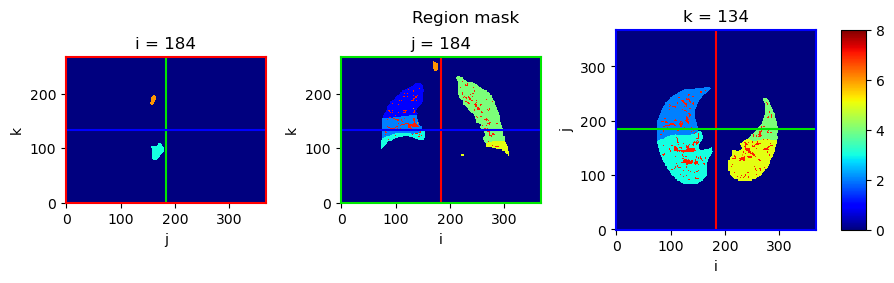

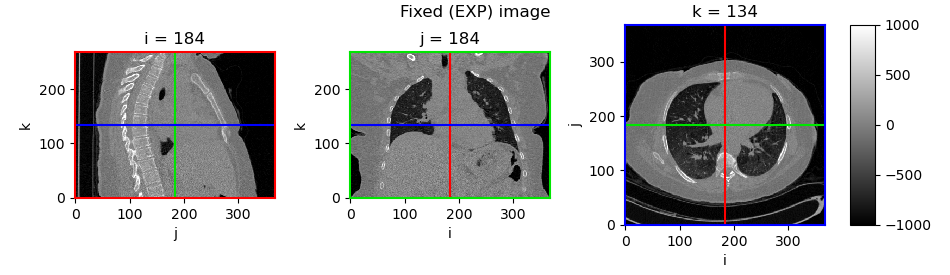

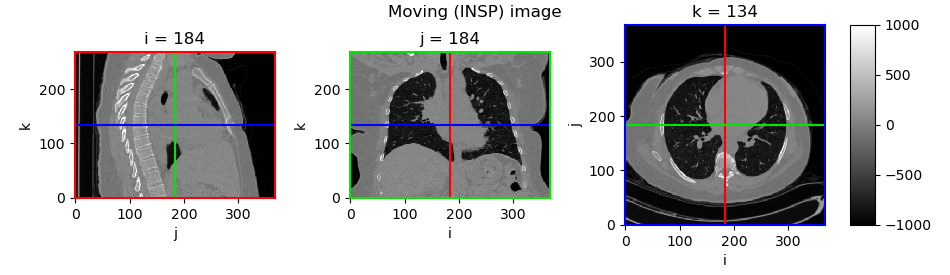

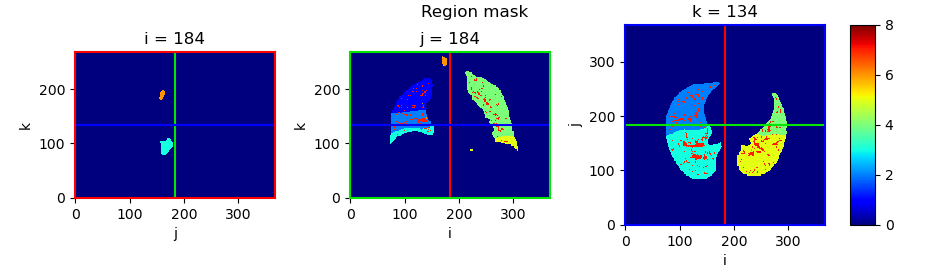

In [59]:
%matplotlib widget
# Visualize images and masks
idx = (0.7, 0.45, 0.5)

project.visual.matplotlib.show_image_slices(
    fixed_array, cmap='gray', clim=(-1000, 1000), title='Fixed (EXP) image'
)
project.visual.matplotlib.show_image_slices(
    moving_array, cmap='gray', clim=(-1000, 1000), title='Moving (INSP) image'
)
project.visual.matplotlib.show_image_slices(
    mask_array, cmap='jet', clim=(0, 8), title='Region mask'
)

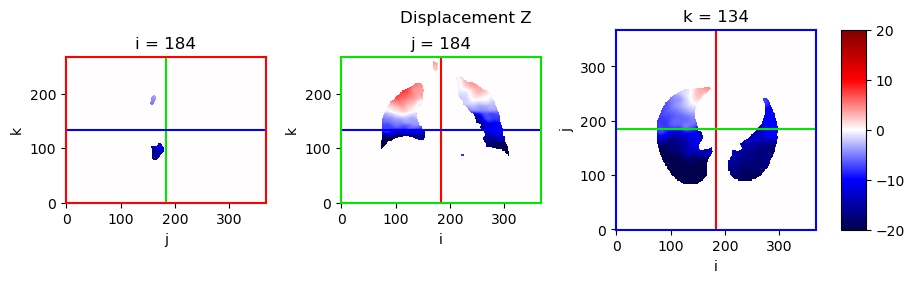

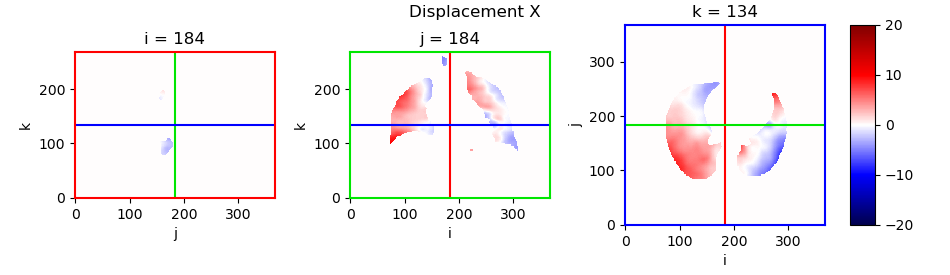

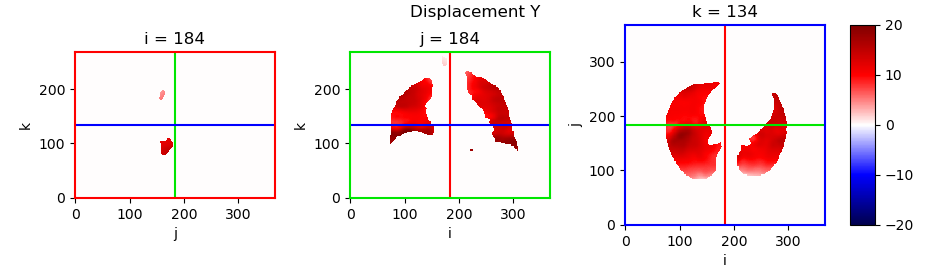

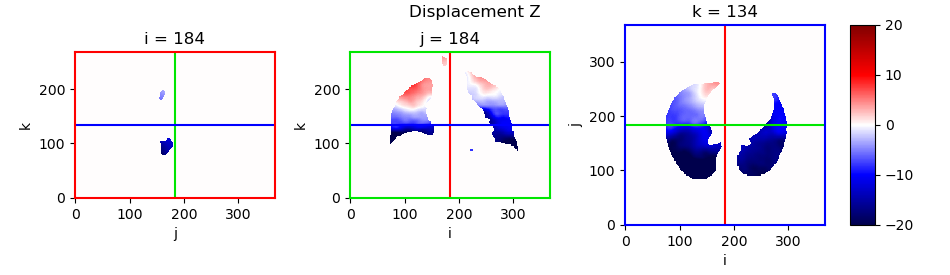

In [64]:
"""alpha = 1
m = (mask_array_t > 0) * alpha + (1 - alpha)
show_image_slices(disp_array[...,0] * m, idx, imshow_kws=dict(cmap='seismic', vmin=-20, vmax=20), title='Component 0', colors='cmy')
show_image_slices(disp_array[...,1] * m, idx, imshow_kws=dict(cmap='seismic', vmin=-20, vmax=20), title='Component 1', colors='cmy')
show_image_slices(disp_array[...,2] * m, idx, imshow_kws=dict(cmap='seismic', vmin=-20, vmax=20), title='Component 2', colors='cmy')"""

# Visualize displacement field components
alpha = 1
m = (mask_array > 0) * alpha + (1 - alpha)

project.visual.matplotlib.show_image_slices(
    disp_array[..., 0] * m, cmap='seismic', clim=(-20, 20), title='Displacement X'
)

project.visual.matplotlib.show_image_slices(
    disp_array[..., 1] * m, cmap='seismic', clim=(-20, 20), title='Displacement Y'
)

project.visual.matplotlib.show_image_slices(
    disp_array[..., 2] * m, cmap='seismic', clim=(-20, 20), title='Displacement Z'
)

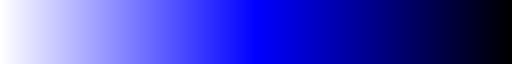

In [66]:
import matplotlib

nneg_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    name='nonnegative',
    colors=[
        (1,1,1),
        (0,0,1),
        (0,0,0),
    ]
)
nneg_cmap.set_under('red')
nneg_cmap

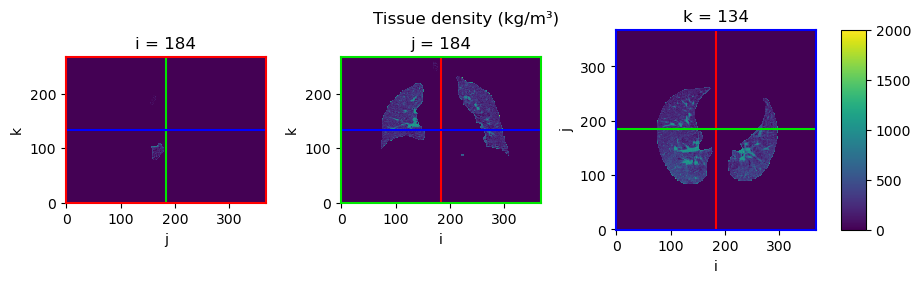

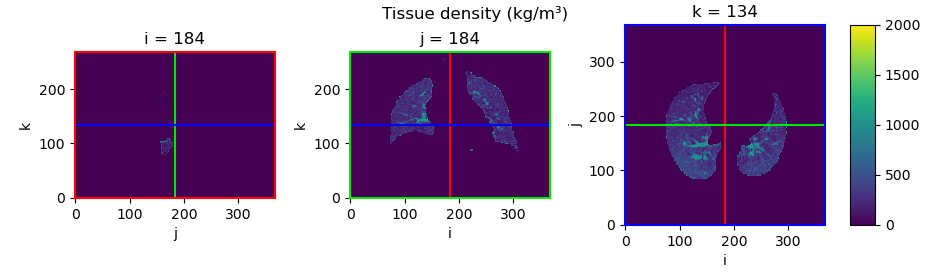

In [67]:
%autoreload

"""density_array = project.preprocessing.segmentation.compute_density_map(target_array, mask_array_t, use_ct=1, use_mask=0)

alpha = 1
m = (mask_array_t > 0) * alpha + (1 - alpha)

show_image_slices(density_array * m, idx, imshow_kws=dict(cmap=nneg_cmap, vmin=0, vmax=2000), title='Tissue density', colors='cmy')"""

# Compute and visualize tissue density from CT values
density_array = project.core.transforms.compute_density_from_ct(fixed_array)

alpha = 1
m = (mask_array > 0) * alpha + (1 - alpha)

project.visual.matplotlib.show_image_slices(
    density_array * m, cmap='viridis', clim=(0, 2000), title='Tissue density (kg/m³)'
)